<a href="https://colab.research.google.com/github/phantom-balance/TEP/blob/master/TEP_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/phantom-balance/TEP.git
%cd TEP

Cloning into 'TEP'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 243 (delta 70), reused 199 (delta 40), pack-reused 0
Receiving objects: 100% (243/243), 59.49 MiB | 11.23 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Checking out files: 100% (120/120), done.
/content/TEP


In [3]:
import matplotlib
import matplotlib.pyplot as plt
from PCA_limit import PCA

In [4]:
Type = [0]
Info = PCA(Type=Type, var_explained=0.40, confidence=0.99)
reduced_dim, UCL_T2, UCL_Q, Data_list = Info.return_func()
print("UCL_T2="+str(float(UCL_T2))+" UCL_Q="+str(float(UCL_Q))+"with reduced dimension "+str(reduced_dim))


UCL_T2=13.865531890687725 UCL_Q=59.03981803243803with reduced dimension7


/content/TEP/PCA_limit.py:34: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ../aten/src/ATen/native/Copy.cpp:244.)
  truncated_eigen_vectors = truncated_eigen_vectors.type(torch.double)


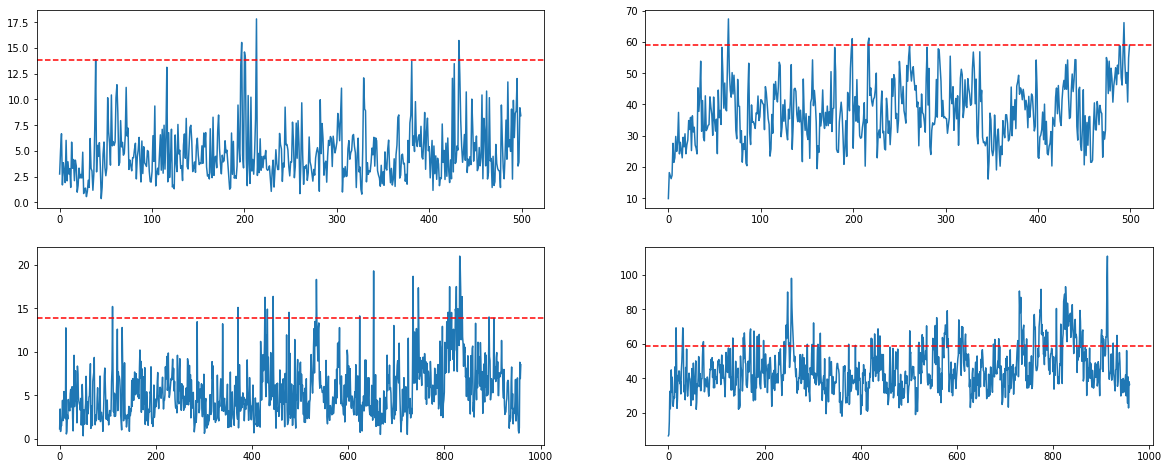

In [5]:
# T2 control chart and Q control chart for NOC
fig, ax = plt.subplots(2*len(Type), 2, figsize=(20, 8))

for i,(train, test) in enumerate(Data_list):
  ax[i,0].plot(train.numpy())
  ax[i,0].axhline(UCL_T2, color='r', ls='--')
  ax[i,1].plot(test.numpy())
  ax[i,1].axhline(UCL_Q, color='r', ls='--')


In [6]:
Type = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
Info = PCA(Type=Type, var_explained=0.40, confidence=0.99)
reduced_dim, UCL_T2, UCL_Q, Data_list = Info.return_func()
print("UCL_T2="+str(float(UCL_T2))+" UCL_Q="+str(float(UCL_Q)))

UCL_T2=13.865531890687725 UCL_Q=59.03981803243803


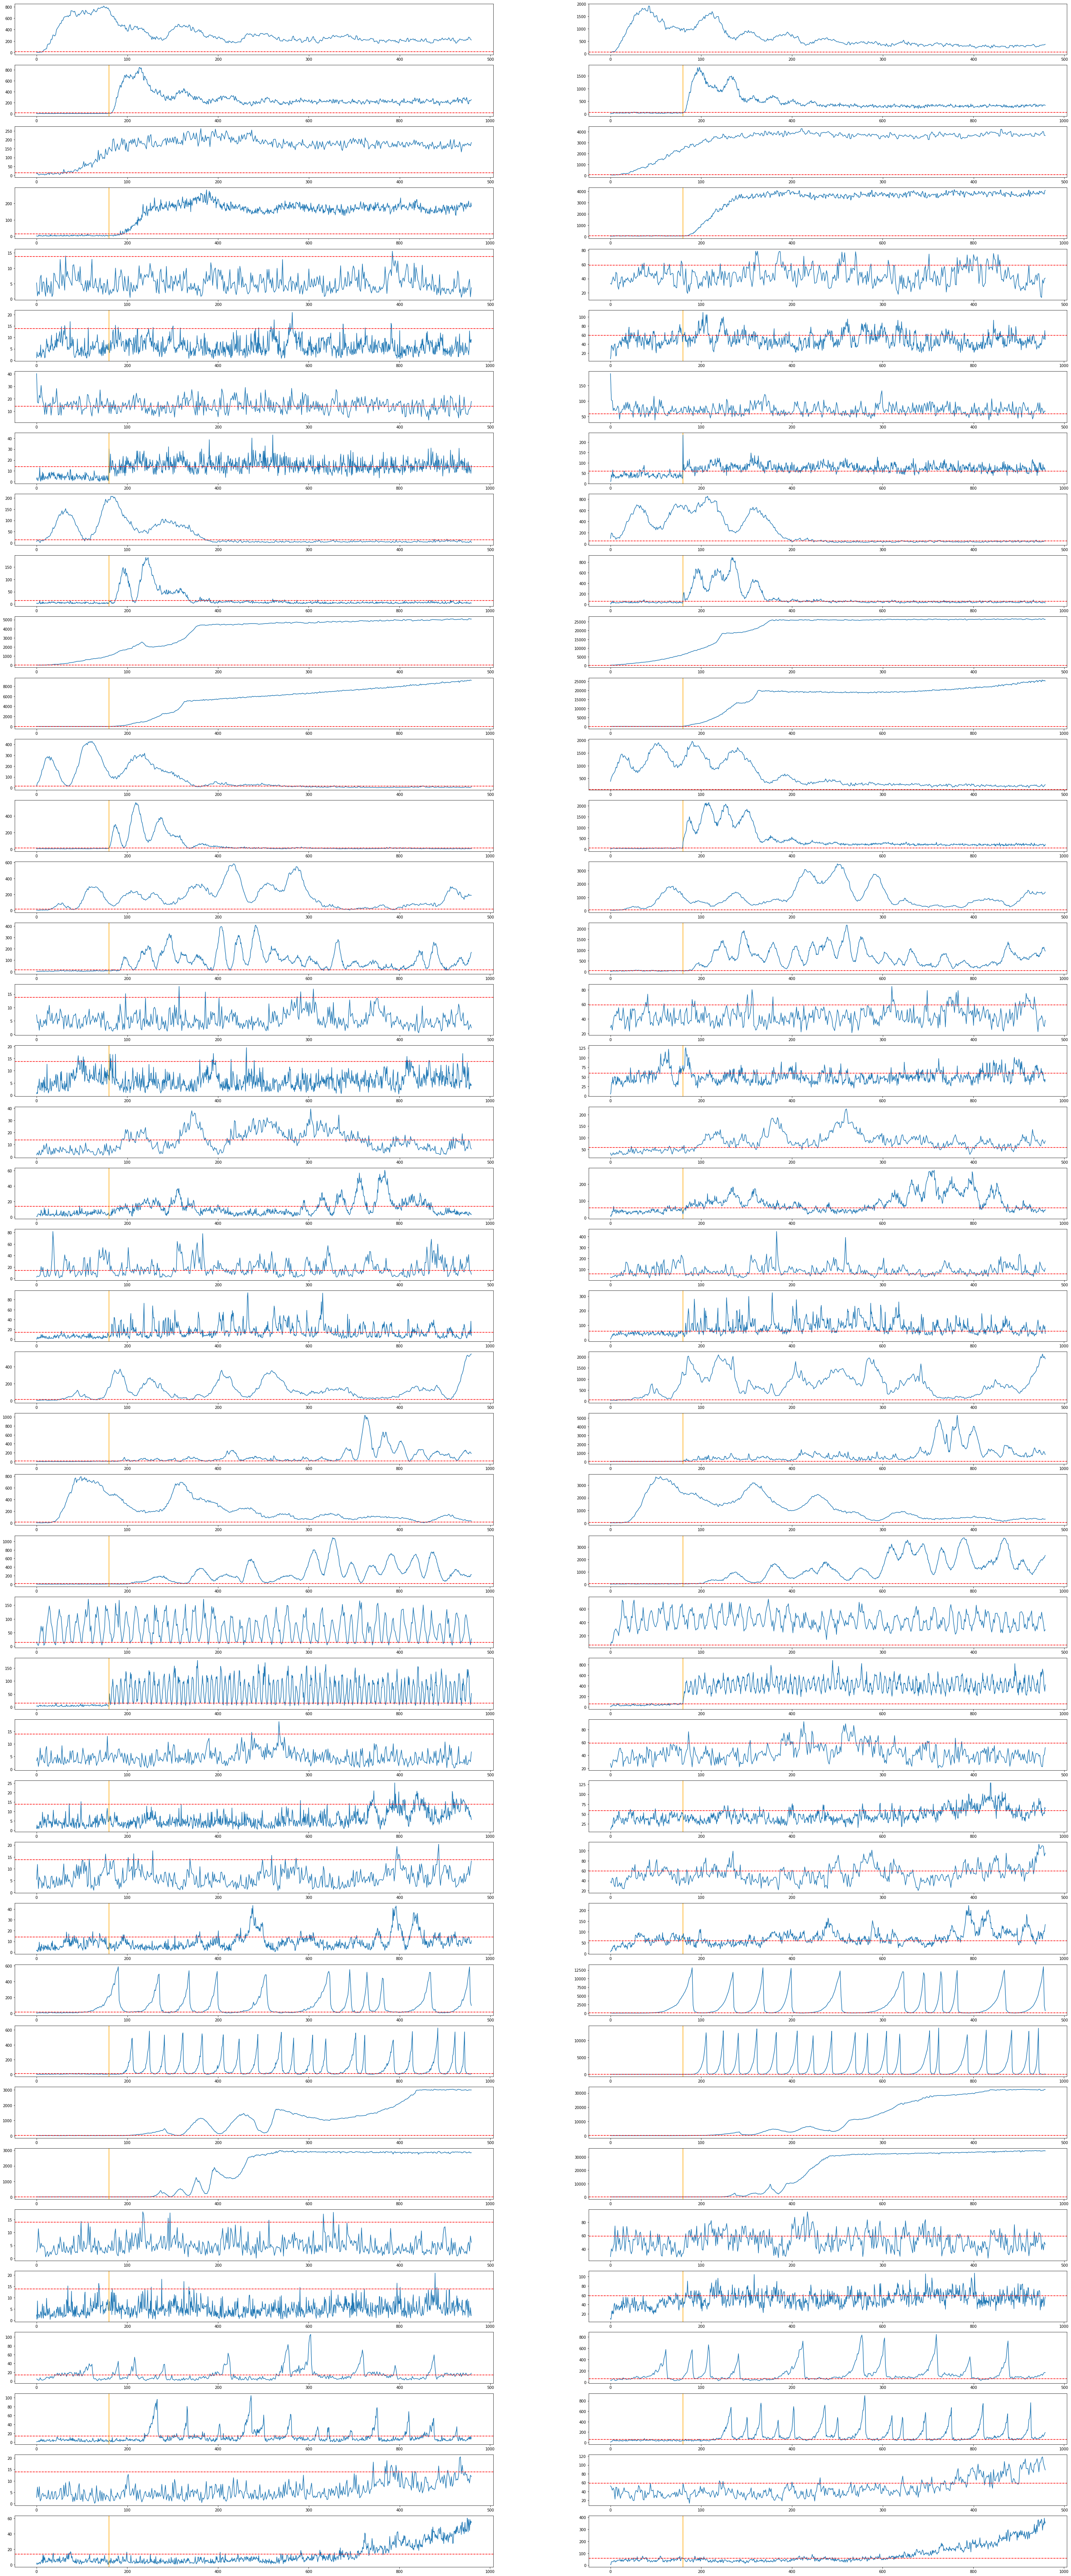

In [7]:
# T2 control chart and Q control chart for different faults
fig, ax = plt.subplots(2*len(Type), 2, figsize=(50, 125))

for i,(train, test) in enumerate(Data_list):
  ax[i,0].plot(train.numpy())
  ax[i,0].axhline(UCL_T2, color='r', ls='--')
  if i % 2 != 0:
    ax[i,0].axvline(160, color='orange')
    ax[i,1].axvline(160, color='orange')
  ax[i,1].plot(test.numpy())
  ax[i,1].axhline(UCL_Q, color='r', ls='--')